<a href="https://colab.research.google.com/github/ShyamSundhar1411/My-ML-Notebooks/blob/master/Classifications/Introduction_to_Computer_Vision_Using_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Convolutional Neural Network and Computer Vision with Tensorflow
Computer Vision : Practice of writing algorithms which can discover patterns in visual data

## Getting Data

In [1]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

--2023-01-07 18:00:43--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.68.128, 74.125.24.128, 142.250.4.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.68.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  15.9MB/s    in 8.1s    

2023-01-07 18:00:51 (12.9 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [2]:
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

## Inspecting the data

In [3]:
!ls pizza_steak

test  train


In [4]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [5]:
import os

for dirpath,dirnames,filenames in os.walk("pizza_steak"):
  print("There are ",len(dirnames)," directories",len(filenames)," in ",dirpath)

There are  2  directories 0  in  pizza_steak
There are  2  directories 0  in  pizza_steak/train
There are  0  directories 750  in  pizza_steak/train/pizza
There are  0  directories 750  in  pizza_steak/train/steak
There are  2  directories 0  in  pizza_steak/test
There are  0  directories 250  in  pizza_steak/test/pizza
There are  0  directories 250  in  pizza_steak/test/steak


In [6]:
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

## Visualizing Images

In [7]:
import pathlib
import numpy as np
train_data_directory = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in train_data_directory.glob("*")]))

In [8]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir,target_class):
  target_folder = target_dir+"/"+target_class
  random_image = random.sample(os.listdir(target_folder),1)
  print(random_image)
  img = mpimg.imread(target_folder+"/"+random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");
  print(img.shape)
  return img

['242813.jpg']
(512, 383, 3)


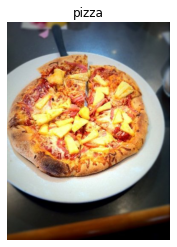

In [10]:
img = view_random_image("pizza_steak/train","pizza")

## End-End CNN Model

In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)


In [12]:
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

In [13]:
train_dir = "/content/pizza_steak/train"
test_dir = "pizza_steak/test"

train_data = train_datagen.flow_from_directory(
    train_dir,batch_size = 32,
    target_size = (224,224),
    class_mode = "binary",
    seed=42
    )
validation_data = valid_datagen.flow_from_directory(
    test_dir,batch_size = 32,
    target_size = (224,224),
    class_mode = "binary",
    seed=42
    )

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [14]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation = "relu",input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
    tf.keras.layers.Conv2D(10,3,activation = "relu"),
    tf.keras.layers.Conv2D(10,3,activation = "relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid"),
])
model_1.compile(loss = "binary_crossentropy",optimizer = "adam",metrics = ["accuracy"])

In [15]:
len(train_data)

47

In [16]:
history_1 = model_1.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data = validation_data,
            validation_steps = len(validation_data)
            )

Epoch 1/5
47/47 [==============================] - 23s 248ms/step - loss: 0.5647 - accuracy: 0.6873 - val_loss: 0.3897 - val_accuracy: 0.8220
Epoch 2/5
47/47 [==============================] - 10s 210ms/step - loss: 0.4285 - accuracy: 0.8107 - val_loss: 0.4053 - val_accuracy: 0.8160
Epoch 3/5
47/47 [==============================] - 11s 228ms/step - loss: 0.3933 - accuracy: 0.8307 - val_loss: 0.3360 - val_accuracy: 0.8640
Epoch 4/5
47/47 [==============================] - 10s 209ms/step - loss: 0.3468 - accuracy: 0.8467 - val_loss: 0.3005 - val_accuracy: 0.8800
Epoch 5/5
47/47 [==============================] - 10s 215ms/step - loss: 0.3202 - accuracy: 0.8740 - val_loss: 0.2828 - val_accuracy: 0.8920


In [17]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

## Non-CNN Model for Image Data

In [18]:
tf.random.set_seed(42)

In [19]:
model_2 = tf.keras.Sequential([
    
    tf.keras.layers.Flatten(input_shape = (224,224,3) ),
    tf.keras.layers.Dense(4,activation = "relu"),
    tf.keras.layers.Dense(4,activation = "relu"),
    tf.keras.layers.Dense(1,activation = "sigmoid"),
])
model_2.compile(optimizer= "adam",loss = "binary_crossentropy",metrics = ["accuracy"])
history_2 = model_2.fit(train_data,epochs = 5,steps_per_epoch=len(train_data),validation_data = validation_data,validation_steps=len(validation_data))

Epoch 1/5
47/47 [==============================] - 10s 201ms/step - loss: 0.7880 - accuracy: 0.4967 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 9s 195ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 9s 197ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 9s 197ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 9s 196ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


In [20]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


In [21]:
tf.random.set_seed(42)
model_3 = tf.keras.Sequential([
     tf.keras.layers.Flatten(input_shape = (224,224,3) ),
    tf.keras.layers.Dense(100,activation = "relu"),
    tf.keras.layers.Dense(100,activation = "relu"),
    tf.keras.layers.Dense(100,activation = "relu"),
    tf.keras.layers.Dense(1,activation = "sigmoid")
])
model_3.compile(optimizer= "adam",loss = "binary_crossentropy",metrics = ["accuracy"])
history_3 = model_3.fit(train_data,epochs = 5,steps_per_epoch=len(train_data),validation_data = validation_data,validation_steps=len(validation_data))

Epoch 1/5
47/47 [==============================] - 12s 246ms/step - loss: 3.0993 - accuracy: 0.6333 - val_loss: 0.5228 - val_accuracy: 0.7400
Epoch 2/5
47/47 [==============================] - 9s 195ms/step - loss: 0.8839 - accuracy: 0.6687 - val_loss: 0.7466 - val_accuracy: 0.7020
Epoch 3/5
47/47 [==============================] - 9s 194ms/step - loss: 0.6985 - accuracy: 0.7247 - val_loss: 0.4916 - val_accuracy: 0.7860
Epoch 4/5
47/47 [==============================] - 9s 197ms/step - loss: 0.6068 - accuracy: 0.7593 - val_loss: 0.6310 - val_accuracy: 0.6960
Epoch 5/5
47/47 [==============================] - 9s 196ms/step - loss: 0.6300 - accuracy: 0.7433 - val_loss: 0.7355 - val_accuracy: 0.6480


## Breaking CNN

### 1. Become one with data

['3656752.jpg']
(512, 512, 3)
['1351146.jpg']
(512, 512, 3)


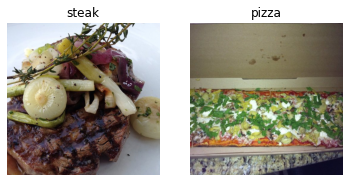

In [27]:
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train","steak")
plt.subplot(1,2,2)
pizza_img = view_random_image("pizza_steak/train","pizza")

### 2. Preprocessing Data

In [28]:
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

In [31]:
## Create train and test data generates and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

In [33]:
train_data = train_datagen.flow_from_directory(directory=train_dir,target_size = (224,224),class_mode = "binary",batch_size = 32)
test_data = test_datagen.flow_from_directory(directory=test_dir,target_size = (224,224),class_mode = "binary",batch_size = 32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [37]:
images,labels = train_data.next()
len(images),len(labels)

(32, 32)

In [38]:
len(train_data)

47

In [40]:
images[:2],images[0].shape

(array([[[[0.01568628, 0.01568628, 0.02352941],
          [0.01568628, 0.01568628, 0.02352941],
          [0.01960784, 0.01960784, 0.02745098],
          ...,
          [0.01568628, 0.01568628, 0.02352941],
          [0.01568628, 0.01568628, 0.02352941],
          [0.01960784, 0.01960784, 0.02745098]],
 
         [[0.01568628, 0.01568628, 0.02352941],
          [0.01568628, 0.01568628, 0.02352941],
          [0.01960784, 0.01960784, 0.02745098],
          ...,
          [0.01568628, 0.01568628, 0.02352941],
          [0.01568628, 0.01568628, 0.02352941],
          [0.01960784, 0.01960784, 0.02745098]],
 
         [[0.01568628, 0.01568628, 0.02352941],
          [0.01568628, 0.01568628, 0.02352941],
          [0.01960784, 0.01960784, 0.02745098],
          ...,
          [0.01568628, 0.01568628, 0.02352941],
          [0.01568628, 0.01568628, 0.02352941],
          [0.01960784, 0.01960784, 0.02745098]],
 
         ...,
 
         [[0.6392157 , 0.6       , 0.6039216 ],
          [0.62745

### 3. Baseline Model

In [43]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(
        filters = 10,
        kernel_size = 3,
        activation = "relu",
        input_shape = (224,224,3),
        padding = "valid",
        strides = (1,1)
        ),
    tf.keras.layers.Conv2D(10,3,activation = "relu"),
    tf.keras.layers.Conv2D(10,3,activation = "relu"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation = "sigmoid"),
])
model_3.compile(loss = "binary_crossentropy",optimizer = "adam",metrics = ["accuracy"])

In [44]:
model_3.fit(train_data,epochs = 5,steps_per_epoch=len(train_data),validation_data = test_data,validation_steps = len(train_data))

Epoch 1/5
47/47 [==============================] - ETA: 0s - loss: 1.0871 - accuracy: 0.6627

47/47 [==============================] - 11s 227ms/step - loss: 1.0871 - accuracy: 0.6627 - val_loss: 0.4084 - val_accuracy: 0.8240
Epoch 2/5
47/47 [==============================] - 8s 161ms/step - loss: 0.4152 - accuracy: 0.8387
Epoch 3/5
47/47 [==============================] - 8s 165ms/step - loss: 0.2928 - accuracy: 0.8853
Epoch 4/5
47/47 [==============================] - 8s 161ms/step - loss: 0.1697 - accuracy: 0.9480
Epoch 5/5
47/47 [==============================] - 8s 161ms/step - loss: 0.0840 - accuracy: 0.9760
